In [2]:
import os


if "original_dir" in globals():
    # current_dir = os.path.dirname(original_dir)
    current_dir = original_dir
    os.chdir(current_dir)
    print(f"Current directory: {current_dir}")
else:
    original_dir = os.getcwd()
    print(f"Current directory: {original_dir}")

os.chdir("../../../") # Depth could be different if you run this script from different places
print(f"Changed directory: {os.getcwd()}")

Current directory: d:\northeastern\neu_dev\myo_assist_dev\myosuite\rl_train\myoassist
Changed directory: d:\northeastern\neu_dev\myo_assist_dev


In [3]:
import numpy as np
from myosuite.rl_train.myoassist.utils.data_types import DictionableDataclass
from myosuite.rl_train.myoassist.utils.environment_handler import EnvironmentHandler
from myosuite.envs.myoassist import myo_leg_18_imitation
from myosuite.rl_train.myoassist.utils.data_types import DictionableDataclass

MyoSuite:> Registering Myo Envs


In [4]:
config = DictionableDataclass.create(myo_leg_18_imitation.ImitationTrainSessionConfig, None)


In [5]:
config.env_params.env_id = "myoLeg18Imitation-v0"
config.env_params.safe_height = 0.0
config.env_params.out_of_trajectory_threshold = 1000
config.env_params.model_path = "myosuite/simhive/myoassist_sim/gait14dof22musc_cvt3_Right_Toeless_2D.xml"
config.env_params.reference_data_path = "myosuite/simhive/myoassist_sim/reference_motions/neumove_02-constspeed_reduced_humanoid.npz"
config.env_params.num_envs = 1


In [6]:
ref_data_dict = EnvironmentHandler.load_reference_data(config)


Loading reference data from myosuite/simhive/myoassist_sim/reference_motions/neumove_02-constspeed_reduced_humanoid.npz


In [7]:
ref_data_dict["series_data"].keys()

dict_keys(['q_pelvis_tx', 'q_pelvis_tz', 'q_pelvis_ty', 'q_pelvis_tilt', 'q_pelvis_list', 'q_pelvis_rotation', 'q_hip_flexion_r', 'q_hip_adduction_r', 'q_hip_rotation_r', 'q_knee_angle_r', 'q_ankle_angle_r', 'q_subtalar_angle_r', 'q_mtp_angle_r', 'q_hip_flexion_l', 'q_hip_adduction_l', 'q_hip_rotation_l', 'q_knee_angle_l', 'q_ankle_angle_l', 'q_subtalar_angle_l', 'q_mtp_angle_l', 'q_lumbar_extension', 'q_lumbar_bending', 'q_lumbar_rotation', 'q_arm_flex_r', 'q_arm_add_r', 'q_arm_rot_r', 'q_elbow_flex_r', 'q_pro_sup_r', 'q_wrist_flex_r', 'q_wrist_dev_r', 'q_arm_flex_l', 'q_arm_add_l', 'q_arm_rot_l', 'q_elbow_flex_l', 'q_pro_sup_l', 'q_wrist_flex_l', 'q_wrist_dev_l', 'dq_pelvis_tx', 'dq_pelvis_tz', 'dq_pelvis_ty', 'dq_pelvis_tilt', 'dq_pelvis_list', 'dq_pelvis_rotation', 'dq_hip_flexion_r', 'dq_hip_adduction_r', 'dq_hip_rotation_r', 'dq_knee_angle_r', 'dq_ankle_angle_r', 'dq_subtalar_angle_r', 'dq_mtp_angle_r', 'dq_hip_flexion_l', 'dq_hip_adduction_l', 'dq_hip_rotation_l', 'dq_knee_angle

In [8]:
def get_min_max_average(series_data):
    return min(series_data), np.average(series_data), max(series_data)


In [9]:
print(get_min_max_average(ref_data_dict["series_data"]["q_lumbar_rotation"]))
print(get_min_max_average(ref_data_dict["series_data"]["q_pelvis_tilt"]))
print(get_min_max_average(ref_data_dict["series_data"]["q_lumbar_extension"]))


(np.float64(-0.2670283395145135), np.float64(-0.05884780564559198), np.float64(0.15540172144764935))
(np.float64(0.04965391975515735), np.float64(0.1350033129973685), np.float64(0.2262292600471023))
(np.float64(-0.40905639682247846), np.float64(-0.31668300929126264), np.float64(-0.2143664695037175))


In [ ]:
env_human = EnvironmentHandler.create_environment(config, False)
env = env_human

Loading reference data from myosuite/simhive/myoassist_sim/reference_motions/neumove_02-constspeed_reduced_humanoid.npz
config.env_params.env_id='myoLeg18Imitation-v0'
=================environment seed: 0=====================
=================environment model_path: myosuite/simhive/myoassist_sim/gait14dof22musc_cvt3_Right_Toeless_2D.xml=====================
    NeuMove MyoLeg18
    
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=0.01, muscle_activation_penalize=0.1, muscle_activation_diff_penalize=0.1, qpos_imitation_rewards={}, end_effector_imitation_reward=0.3)
===============================PARAMETERS=============================


In [11]:
env.reset()
# for _ in range(100):
#     env.step(np.zeros(env.action_space.shape))
original_qpos = env.sim.data.qpos.copy()
print(original_qpos)

[-0.6551  0.2642  1.7359 -0.3638 -0.0036 -0.3931  0.0154 -0.8001 -0.0289
 -0.0346  0.0544  0.0388  0.0525  0.0422 -0.0233 -0.4003 -0.0238 -0.3656
 -0.0036 -0.3931  0.0139 -0.7258 -0.0289 -0.0345  0.0544  0.0389  0.0524
  0.0424 -0.0229 -0.4004  0.0237 -0.0303 -0.0373 -0.0739  0.0795 -0.0373
 -0.0739 -0.0795]


In [12]:
joint_names = []
for idx in range(env.sim.model.njnt):
    joint_name = env.sim.model.joint(idx).name
    joint_model = env.sim.model.joint(joint_name)
    joint_names.append((joint_model.id, joint_name, original_qpos[idx]))

In [13]:
joint_names

[(0, 'pelvis_tx', np.float64(-0.6551019046433904)),
 (1, 'pelvis_ty', np.float64(0.26416936044524403)),
 (2, 'pelvis_tilt', np.float64(1.7359445659192716)),
 (3, 'hip_flexion_r', np.float64(-0.3637665217215208)),
 (4, 'knee_r_translation1', np.float64(-0.003590537906329909)),
 (5, 'knee_r_translation2', np.float64(-0.39307468614837965)),
 (6, 'knee_angle_r', np.float64(0.015425309994662923)),
 (7, 'ankle_angle_r', np.float64(-0.8000894573828531)),
 (8, 'hamstrings_r_semimem_r-P2_x', np.float64(-0.02892392029333453)),
 (9, 'hamstrings_r_semimem_r-P2_y', np.float64(-0.03456108758754591)),
 (10, 'rect_fem_r_rect_fem_r-P3_x', np.float64(0.054440918172689694)),
 (11, 'rect_fem_r_rect_fem_r-P3_y', np.float64(0.038809496197579056)),
 (12, 'vasti_r_vas_int_r-P4_x', np.float64(0.052480167483754746)),
 (13, 'vasti_r_vas_int_r-P4_y', np.float64(0.04223675270499772)),
 (14, 'gastroc_r_med_gas_r-P2_x', np.float64(-0.023275367614809996)),
 (15, 'gastroc_r_med_gas_r-P2_y', np.float64(-0.4002961561891

change pelvis_ty(1) to 0.93
change pelvis_tx(0) to 100
change knee_r_translation2(5) to -0.39307468614837965
change knee_l_translation2(19) to -0.3931173080018343
change lumbar_extension(31) to -0.187
change pelvis_tilt(2) to 0.135


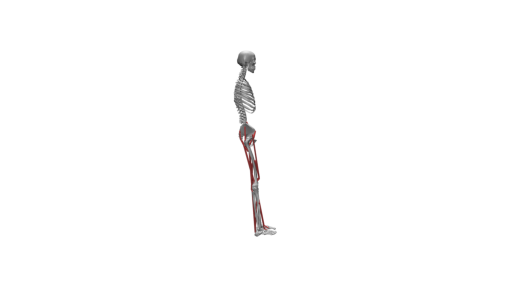

In [14]:
# for _ in range(100):
#     env.step(np.zeros(env.action_space.shape))
env.sim.data.qpos = original_qpos.copy()
joint_names = []
for idx in range(env.sim.model.njnt):
    joint_name = env.sim.model.joint(idx).name
    joint_model = env.sim.model.joint(joint_name)
    joint_names.append(joint_name)
def change_joint_pos(joint_name, pos):
    joint_id = env.sim.model.joint(joint_name).id
    print(f"change {joint_name}({joint_id}) to {pos}")
    env.sim.data.qpos[joint_id] = pos
def get_joint_pos(joint_name, arr):
    joint_id = env.sim.model.joint(joint_name).id
    return arr[joint_id]
env.sim.data.qpos[:] = 0.0
# env.sim.data.qpos[:5] = 0.0
# env.sim.data.qpos[6:] = 0.0
# change_joint_pos("pelvis_tx", get_joint_pos("pelvis_tx", original_qpos))
change_joint_pos("pelvis_ty", 0.93)
change_joint_pos("pelvis_tx", 100)
# change_joint_pos("knee_r_translation1", -0.5 + get_joint_pos("knee_r_translation1", original_qpos))
change_joint_pos("knee_r_translation2", get_joint_pos("knee_r_translation2", original_qpos))
change_joint_pos("knee_l_translation2", get_joint_pos("knee_l_translation2", original_qpos))
change_joint_pos("lumbar_extension", -0.187)
change_joint_pos("pelvis_tilt", 0.135)

env.sim.forward()
frame = env.sim.renderer.render_offscreen(camera_id=1,
                                            width=1920,
                                            height=1080)
import matplotlib.pyplot as plt

plt.imshow(frame)
plt.axis('off')
plt.show()

# Dephy

In [26]:
config.env_params.env_id = "myoLeg18Imitation-v0"
config.env_params.safe_height = 0.0
config.env_params.out_of_trajectory_threshold = 1000
config.env_params.model_path = "myosuite/simhive/myoassist_sim/gait14dof26musc_cvt3_Right_2D_DEPHY.xml"
config.env_params.reference_data_path = "myosuite/simhive/myoassist_sim/reference_motions/neumove_02-constspeed_reduced_humanoid.npz"
config.env_params.num_envs = 1

config.env_params.enable_lumbar_joint = False


In [27]:
ref_data_dict = EnvironmentHandler.load_reference_data(config)

Loading reference data from myosuite/simhive/myoassist_sim/reference_motions/neumove_02-constspeed_reduced_humanoid.npz


In [30]:
env_exo = EnvironmentHandler.create_environment(config, False)
env = env_exo

Loading reference data from myosuite/simhive/myoassist_sim/reference_motions/neumove_02-constspeed_reduced_humanoid.npz
config.env_params.env_id='myoLeg18Imitation-v0'
=================environment seed: 0=====================
=================environment model_path: myosuite/simhive/myoassist_sim/gait14dof26musc_cvt3_Right_2D_DEPHY.xml=====================
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=0.01, muscle_activation_penalize=0.1, muscle_activation_diff_penalize=0.1, qpos_imitation_rewards={}, end_effector_imitation_reward=0.3)
===============================PARAMETERS=============================


In [34]:
joint_names = []
for idx in range(env.sim.model.njnt):
    joint_name = env.sim.model.joint(idx).name
    joint_model = env.sim.model.joint(joint_name)
    print(f"{idx}: {joint_name}")

0: pelvis_tx
1: pelvis_ty
2: pelvis_tilt
3: hip_flexion_r
4: knee_r_translation1
5: knee_r_translation2
6: knee_angle_r
7: ankle_angle_r
8: mtp_angle_r
9: hamstrings_r_semimem_r-P2_x
10: hamstrings_r_semimem_r-P2_y
11: rect_fem_r_rect_fem_r-P3_x
12: rect_fem_r_rect_fem_r-P3_y
13: vasti_r_vas_int_r-P4_x
14: vasti_r_vas_int_r-P4_y
15: gastroc_r_med_gas_r-P2_x
16: gastroc_r_med_gas_r-P2_y
17: gastroc_r_med_gas_r-P2_z
18: hip_flexion_l
19: knee_l_translation1
20: knee_l_translation2
21: knee_angle_l
22: ankle_angle_l
23: mtp_angle_l
24: hamstrings_l_semimem_l-P2_x
25: hamstrings_l_semimem_l-P2_y
26: rect_fem_l_rect_fem_l-P3_x
27: rect_fem_l_rect_fem_l-P3_y
28: vasti_l_vas_int_l-P4_x
29: vasti_l_vas_int_l-P4_y
30: gastroc_l_med_gas_l-P2_x
31: gastroc_l_med_gas_l-P2_y
32: gastroc_l_med_gas_l-P2_z
33: lumbar_extension
34: iliopsoas_r_psoas_r-P3_x
35: iliopsoas_r_psoas_r-P3_y
36: iliopsoas_r_psoas_r-P3_z
37: iliopsoas_l_psoas_l-P3_x
38: iliopsoas_l_psoas_l-P3_y
39: iliopsoas_l_psoas_l-P3_z


## MyoLeg18Base.get_obs_dict()
```python

DEFAULT_OBS_KEYS = ['qpos',
                        'qvel',
                        'act',
                        ]
    
OBS_JOINTS_POS_KEYS = ['ankle_angle_l', 'ankle_angle_r',
                        'hip_flexion_l', 'hip_flexion_r',
                        'knee_angle_l', 'knee_angle_r',
                        'pelvis_tilt', 
                    #    'pelvis_tx', 
                        'pelvis_ty',
                        'lumbar_extension']
OBS_JOINTS_VEL_KEYS = ['ankle_angle_l', 'ankle_angle_r',
                        'hip_flexion_l', 'hip_flexion_r',
                        'knee_angle_l', 'knee_angle_r',
                        'pelvis_tilt', 
                        'pelvis_tx', 
                        'pelvis_ty',
                        'lumbar_extension']
                        
    def get_obs_dict(self, sim):
        # TODO observation - tx exclude
        obs_dict = {}
        obs_dict['time'] = np.array([sim.data.time]) # they use time separately like t, obs = self.obsdict2obsvec(self.obs_dict, self.obs_keys)

        qpos = []
        for key in self.OBS_JOINTS_POS_KEYS:
            qpos.append(sim.data.joint(f"{key}").qpos[0].copy())
        qvel = []
        for key in self.OBS_JOINTS_VEL_KEYS:
            qvel.append(sim.data.joint(f"{key}").qvel[0].copy())
        obs_dict['qpos'] = np.array(qpos) # 7 + 1 elements
        obs_dict['qvel'] = np.array(qvel) # 7 + 2 elements
        if sim.model.na>0:
            # BaseV0 Add the key like this: obs_keys.append("act")
            obs_dict['act'] = sim.data.act[:].copy() # 22 elements

        return obs_dict

```
note that lumbar_extension will be removed if you set "enable_lumbar_extension" as false in config


In [41]:
env.action_space.shape

(29,)

In [40]:
obs, reward, done, truncated, info = env.step(np.zeros(env.action_space.shape))
for idx in range(len(obs)):
    print(f"{idx}: {obs[idx]}")



0: -1.196876049041748
1: -1.196768879890442
2: -0.3645807206630707
3: -0.36449456214904785
4: 0.006767692044377327
5: 0.006719289347529411
6: 1.765973687171936
7: 0.2947741448879242
8: -0.3007408678531647
9: -0.296425998210907
10: 0.06463821977376938
11: 0.06493926048278809
12: 0.021052679046988487
13: 0.020833060145378113
14: -0.014313302002847195
15: 0.018653016537427902
16: -0.05666857212781906
17: 0.5
18: 0.5
19: 0.5
20: 0.5
21: 0.5
22: 0.5
23: 0.5
24: 0.5
25: 0.5
26: 0.5
27: 0.5
28: 0.5
29: 0.5
30: 0.5
31: 0.5
32: 0.5
33: 0.5
34: 0.5
35: 0.5
36: 0.5
37: 0.5
38: 0.5
39: 0.5
40: 0.5
41: 0.5
42: 0.5


In [36]:
actuator_names = []
for idx in range(env.sim.model.na):
    actuator_name = env.sim.model.actuator(idx).name
    actuator_names.append(actuator_name)
    print(f"{idx}: {actuator_name}")
print()
for idx in range(env.sim.model.nu):
    print(f"{idx}: {env.sim.model.actuator(idx).name}")


0: abd_r
1: add_r
2: hamstrings_r
3: bifemsh_r
4: edl_r
5: fdl_r
6: glut_max_r
7: iliopsoas_r
8: rect_fem_r
9: vasti_r
10: gastroc_r
11: soleus_r
12: tib_ant_r
13: abd_l
14: add_l
15: hamstrings_l
16: bifemsh_l
17: edl_l
18: fdl_l
19: glut_max_l
20: iliopsoas_l
21: rect_fem_l
22: vasti_l
23: gastroc_l
24: soleus_l
25: tib_ant_l

0: abd_r
1: add_r
2: hamstrings_r
3: bifemsh_r
4: edl_r
5: fdl_r
6: glut_max_r
7: iliopsoas_r
8: rect_fem_r
9: vasti_r
10: gastroc_r
11: soleus_r
12: tib_ant_r
13: abd_l
14: add_l
15: hamstrings_l
16: bifemsh_l
17: edl_l
18: fdl_l
19: glut_max_l
20: iliopsoas_l
21: rect_fem_l
22: vasti_l
23: gastroc_l
24: soleus_l
25: tib_ant_l
26: Exo_R
27: Exo_L
28: lumbar_extension_motor
